# SNSim Examples

### Example to show how generate 1 light curve for SNIa and SNCC 

In [1]:
import snsim
import numpy as np
import pandas as pd
from snsim.constants import C_LIGHT_KMS

### Init Survey Obj from observation file 

In [2]:
# Set the survey
survey_config = {'survey_file': './survey_file_example.csv', #survey observation log
                 'sig_psf': 0.0,
                 'sig_zp': 0.0,
                 'gain': 1.,
                 'zp': 25.,
                 'ra_size': 7.295,
                 'dec_size': 7.465,
                 'noise_key': ['skynoise', 'skysigADU']}

#init survey OBJ
survey = snsim.survey_host.SurveyObs(survey_config)
print(survey)

SURVEY FILE : ./survey_file_example.csv

First day in survey_file : 58000.00 MJD / 2017-09-04 00:00:00.000
Last day in survey_file : 58100.00 MJD / 2017-12-13 00:00:00.000

Survey effective duration is 100.00 days

Survey envelope area is 57.74 squared degrees (0.1 % of the sky)

No cut on survey file.


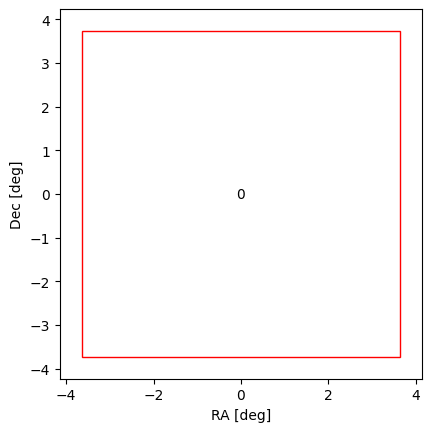

In [3]:
# Show the field map (Here one quadrant labeled 0)
survey.show_map()



#### Set the cosmology

In [4]:

# Set the cosmology (astropy.cosmology object)
cosmology = {'name': 'planck18'}
cosmo =  snsim.utils.set_cosmo(cosmology)

## SNIa simulation

### Init SN parameters

In [5]:
# Set the SNIa parameters
zcos = 0.05
coords = np.radians([42, 42])

#parameters of SNIa object
sn_par = {'zcos': zcos,
          'z2cmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          'sim_t0': 58030,#simulated peak time of the event
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.0,
          'sncosmo':{'x1':1 , 'c':0.1} #parameter of of Salt model for SNIa
           }


# Set the sncosmo model for SNIa
sn_model = snsim.utils.init_sn_model('salt2')


#parameters of SNIa model
model_par = {'M0': -19.3,
             'alpha': 0.14,
             'beta': 3.1,
             'mod_fcov': False}


#Init SNIa object
SNIa = snsim.astrobj.SNIa(sn_par, sn_model, model_par=model_par)



In [6]:
#create a disctionary with parameter needed to define the observations of the SN
#evaluate Z-obs and time range where we can observed the event in the rest frame
#( [-20,50] phase respect to t_peak where Salt model is defined)
dict_obs_par={}
_1_zobs_ = (1 +sn_par['zcos']) * (1+sn_par['z2cmb'])*(1 + sn_par['vpec'] / C_LIGHT_KMS)    
dict_obs_par['min_t'] = sn_par['sim_t0'] -20 * _1_zobs_
dict_obs_par['max_t'] = sn_par['sim_t0'] + 50 * _1_zobs_
dict_obs_par['1_zobs'] = _1_zobs_
dict_obs_par['sim_t0']=sn_par['sim_t0']
dict_obs_par['ra']=sn_par['ra']
dict_obs_par['dec']=sn_par['dec']

#convert it to a DataFrame
obs_par=pd.DataFrame(dict_obs_par,index=[0])
obs_par

,min_t,max_t,1_zobs,sim_t0,ra,dec
0,58008.978985,58082.552536,1.051051,58030,0.733038,0.733038


### Define the observation and simulate the light curve

In [7]:
#define the observation of the object
epochs,param= survey.get_observations(obs_par,[-50,70])
epochs

,time,band,fieldID,skynoise,zp,sig_zp,sig_psf,gain,zpsys
ID,,,,,,,,,
0,58000.000000,ztfg,1,629.554693,25.0,0.0,0.0,1.0,ab
0,58002.040816,ztfg,1,794.918147,25.0,0.0,0.0,1.0,ab
0,58004.081633,ztfg,1,857.808033,25.0,0.0,0.0,1.0,ab
0,58006.122449,ztfg,1,736.170271,25.0,0.0,0.0,1.0,ab
0,58008.163265,ztfg,1,716.202148,25.0,0.0,0.0,1.0,ab
0,58010.204082,ztfg,1,558.747930,25.0,0.0,0.0,1.0,ab
0,58012.244898,ztfr,1,242.029050,25.0,0.0,0.0,1.0,ab
0,58014.285714,ztfr,1,107.626067,25.0,0.0,0.0,1.0,ab
0,58016.326531,ztfg,1,18.283325,25.0,0.0,0.0,1.0,ab


In [8]:
#simulate the LC
lc=SNIa.gen_flux(epochs,np.random.default_rng(1200))
lc

,ID,time,fluxtrue,flux,fluxerr,mag,magerr,zp,zpsys,gain,skynoise,band,fieldID,sig_zp,sig_psf
epochs,,,,,,,,,,,,,,,
0,0,58000.000000,0.000000,-701.592882,629.554693,NaN,NaN,25.0,ab,1.0,629.554693,ztfg,1,0.0,0.0
1,0,58002.040816,0.000000,-557.947914,794.918147,NaN,NaN,25.0,ab,1.0,794.918147,ztfg,1,0.0,0.0
2,0,58004.081633,0.000000,-387.136914,857.808033,NaN,NaN,25.0,ab,1.0,857.808033,ztfg,1,0.0,0.0
3,0,58006.122449,0.000000,13.609242,736.170271,22.165415,58.731170,25.0,ab,1.0,736.170271,ztfg,1,0.0,0.0
4,0,58008.163265,0.000000,451.415442,716.202148,18.363559,1.722596,25.0,ab,1.0,716.202148,ztfg,1,0.0,0.0
5,0,58010.204082,3.818568,-33.314118,558.751347,NaN,NaN,25.0,ab,1.0,558.747930,ztfg,1,0.0,0.0
6,0,58012.244898,33.355528,168.362090,242.097948,19.434389,1.561245,25.0,ab,1.0,242.029050,ztfr,1,0.0,0.0
7,0,58014.285714,104.412586,247.090869,108.110050,19.017858,0.475044,25.0,ab,1.0,107.626067,ztfr,1,0.0,0.0
8,0,58016.326531,225.985564,181.513793,23.669929,19.352726,0.141583,25.0,ab,1.0,18.283325,ztfg,1,0.0,0.0


In [9]:
#parameters of the object in Lc header
lc.attrs

{'zobs': 0.05105072689987433,
 'sim_t0': 58030,
 'sim_x1': 1,
 'sim_c': 0.1,
 'sim_x0': 0.0013413322249302211,
 'type': 'snIa',
 'ra': 0.7330382858376184,
 'dec': 0.7330382858376184,
 'zcos': 0.05,
 'zCMB': 0.05105072689987433,
 'zpec': 0.0010006922855944561,
 'vpec': 300,
 'z2cmb': 0.0,
 'sim_mu': 36.81185565719685,
 'como_dist': 218.93393187129323,
 'sim_mb': 17.68185565719685,
 'mag_sct': 0.0,
 'template': 'salt2'}

### Plot the SN

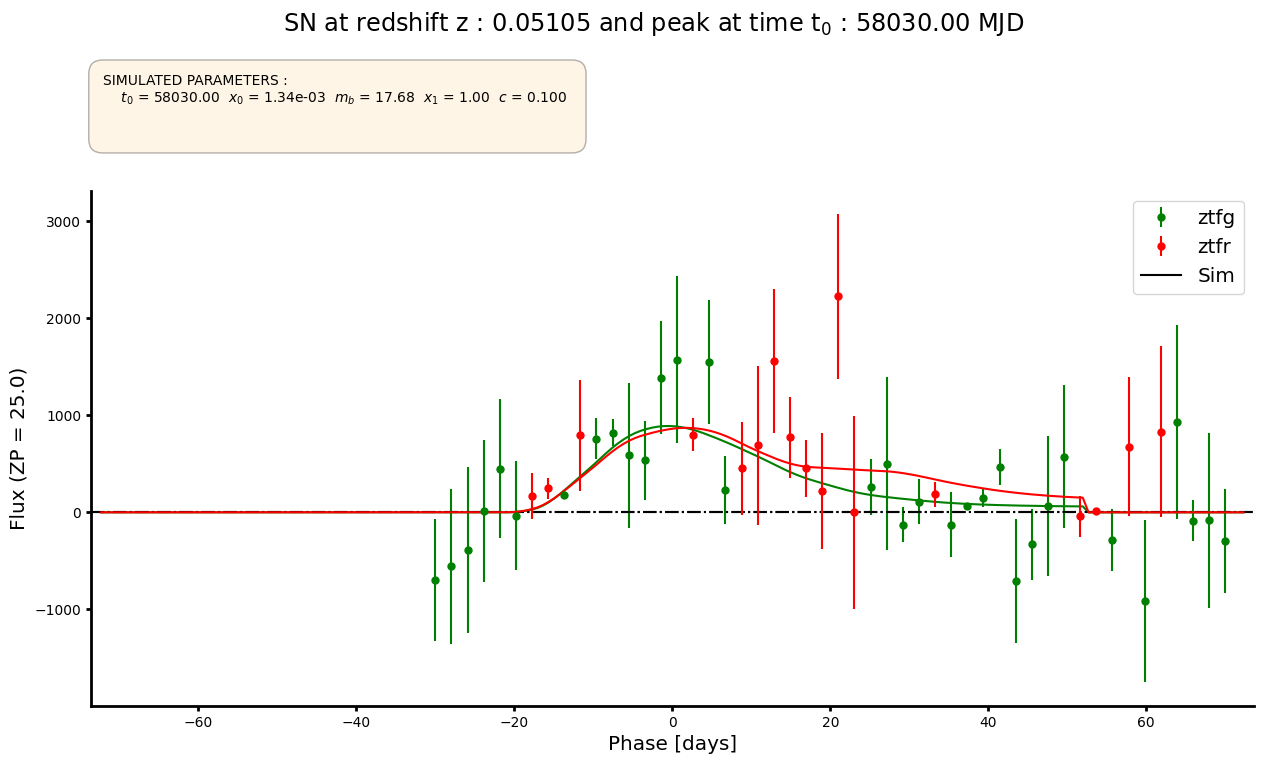

In [10]:
bandcol = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'gold'}
snsim.plot_utils.plot_lc(lc,lc.attrs, snc_sim_model=SNIa.sim_model,
                        bandcol=bandcol,phase_limit=[-70,70])

# Now we simulate 1 SN Core-Collapse

#### we use same observation file and cosmology as before

### We simulate a SNIc, but the method is the same for all SNCC

In [11]:
# Set the SNIc parameters
zcos = 0.02
coords = np.radians([42, 42])

#parameters of SNIc object
sn_par = {'zcos': zcos,
          'z2cmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 500,
          'sim_t0': 58030,#simulated peak time of the event
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.3,
          'sncosmo': {} #no sncosmo model parameter needed in this case
           }


# Set the sncosmo model for SNIc
sn_model = snsim.utils.init_sn_model('v19-2007gr') #name of sncosmo built-in source


#parameters of SNIc model
model_par = {'M0': -18,
            'mod_fcov': False} #absolute magnitude in r-band


#Init SNIc object
SNIc = snsim.astrobj.SNIc(sn_par, sn_model, model_par=model_par)

In [12]:
#create a disctionary with parameter needed to define the observations of the SN
#evaluate Z-obs and time range where we can observed the event in the rest frame
#( [-20,50] phase respect to t_peak where Salt model is defined)
dict_obs_par={}
_1_zobs_ = (1 +sn_par['zcos']) * (1+sn_par['z2cmb'])*(1 + sn_par['vpec'] / C_LIGHT_KMS)    
dict_obs_par['min_t'] = SNIc.sim_model.mintime()
dict_obs_par['max_t'] = SNIc.sim_model.maxtime()
dict_obs_par['1_zobs'] = _1_zobs_
dict_obs_par['sim_t0']=sn_par['sim_t0']
dict_obs_par['ra']=sn_par['ra']
dict_obs_par['dec']=sn_par['dec']

#convert it to a DataFrame
obs_par=pd.DataFrame(dict_obs_par,index=[0])
obs_par

,min_t,max_t,1_zobs,sim_t0,ra,dec
0,58012.958024,58216.000699,1.021701,58030,0.733038,0.733038


In [13]:
#define the observation of the object
epochs,param= survey.get_observations(obs_par,[-200,250])
epochs

,time,band,fieldID,skynoise,zp,sig_zp,sig_psf,gain,zpsys
ID,,,,,,,,,
0,58000.000000,ztfg,1,629.554693,25.0,0.0,0.0,1.0,ab
0,58002.040816,ztfg,1,794.918147,25.0,0.0,0.0,1.0,ab
0,58004.081633,ztfg,1,857.808033,25.0,0.0,0.0,1.0,ab
0,58006.122449,ztfg,1,736.170271,25.0,0.0,0.0,1.0,ab
0,58008.163265,ztfg,1,716.202148,25.0,0.0,0.0,1.0,ab
0,58010.204082,ztfg,1,558.747930,25.0,0.0,0.0,1.0,ab
0,58012.244898,ztfr,1,242.029050,25.0,0.0,0.0,1.0,ab
0,58014.285714,ztfr,1,107.626067,25.0,0.0,0.0,1.0,ab
0,58016.326531,ztfg,1,18.283325,25.0,0.0,0.0,1.0,ab


In [14]:
#simulate the LC
lc=SNIc.gen_flux(epochs,np.random.default_rng(1200))
lc

,ID,time,fluxtrue,flux,fluxerr,mag,magerr,zp,zpsys,gain,skynoise,band,fieldID,sig_zp,sig_psf
epochs,,,,,,,,,,,,,,,
0,0,58000.000000,0.000000,-701.592882,629.554693,NaN,NaN,25.0,ab,1.0,629.554693,ztfg,1,0.0,0.0
1,0,58002.040816,0.000000,-557.947914,794.918147,NaN,NaN,25.0,ab,1.0,794.918147,ztfg,1,0.0,0.0
2,0,58004.081633,0.000000,-387.136914,857.808033,NaN,NaN,25.0,ab,1.0,857.808033,ztfg,1,0.0,0.0
3,0,58006.122449,0.000000,13.609242,736.170271,22.165415,58.731170,25.0,ab,1.0,736.170271,ztfg,1,0.0,0.0
4,0,58008.163265,0.000000,451.415442,716.202148,18.363559,1.722596,25.0,ab,1.0,716.202148,ztfg,1,0.0,0.0
5,0,58010.204082,0.000000,-37.132459,558.747930,NaN,NaN,25.0,ab,1.0,558.747930,ztfg,1,0.0,0.0
6,0,58012.244898,0.000000,134.968140,242.029050,19.674422,1.946976,25.0,ab,1.0,242.029050,ztfr,1,0.0,0.0
7,0,58014.285714,81.750504,224.290397,108.005189,19.122973,0.522827,25.0,ab,1.0,107.626067,ztfr,1,0.0,0.0
8,0,58016.326531,214.888424,170.859280,23.434342,19.418404,0.148915,25.0,ab,1.0,18.283325,ztfg,1,0.0,0.0


In [15]:
lc.attrs

{'zobs': 0.021701176885510653,
 'sim_t0': 58030,
 'sim_amplitude': 3.537229263043246e-14,
 'type': 'snIc',
 'ra': 0.7330382858376184,
 'dec': 0.7330382858376184,
 'zcos': 0.02,
 'zCMB': 0.021701176885510653,
 'zpec': 0.0016678204759907602,
 'vpec': 500,
 'z2cmb': 0.0,
 'sim_mu': 34.77763241667154,
 'como_dist': 88.20208831459321,
 'sim_mb': 17.258117429121988,
 'mag_sct': 0.3,
 'template': 'v19-2007gr'}

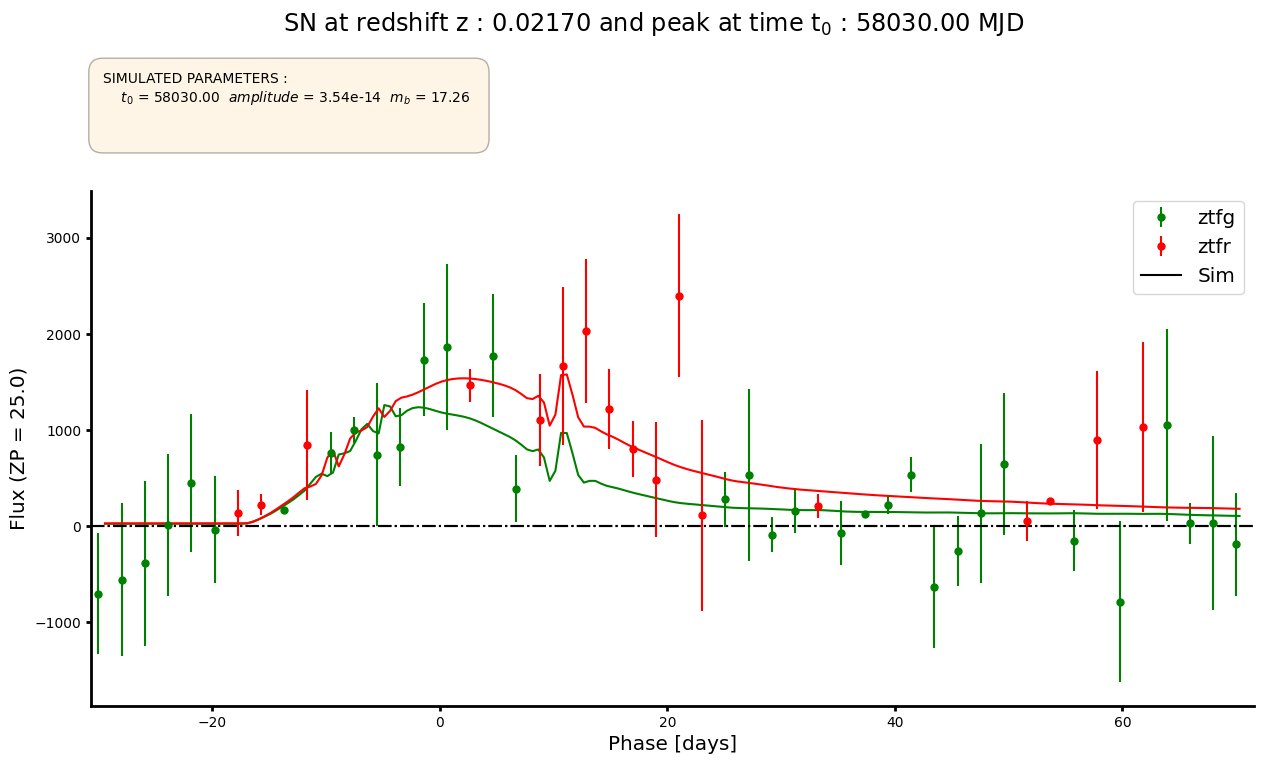

In [16]:
bandcol = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'gold'}
snsim.plot_utils.plot_lc(lc,lc.attrs, snc_sim_model=SNIc.sim_model,
                        bandcol=bandcol,phase_limit=[-30,70])